In [ ]:
print("Hello")

Hello


In [ ]:
# downlading dataset using kaggle api
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 674M/675M [00:10<00:00, 64.5MB/s]
100% 675M/675M [00:10<00:00, 66.9MB/s]


In [ ]:
!mkdir Datasets

In [ ]:
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [ ]:
with ZipFile('/content/cell-images-for-detecting-malaria.zip') as fp:
  fp.extractall('/content/Datasets')

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
print(len(os.listdir('/content/Datasets/cell_images/Parasitized')))
print(len(os.listdir('/content/Datasets/cell_images/cell_images/Parasitized')))

13780
13780


In [ ]:
l1 = os.listdir('/content/Datasets/cell_images/cell_images/Parasitized')
l2 = os.listdir('/content/Datasets/cell_images/cell_images/Uninfected')

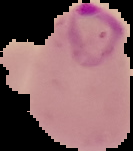

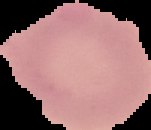

In [ ]:
a = cv2.imread(os.path.join('/content/Datasets/cell_images/Parasitized' , l1[0]))
b = cv2.imread(os.path.join('/content/Datasets/cell_images/cell_images/Uninfected' , l2[0]))
cv2_imshow(a)
cv2_imshow(b)

In [ ]:
imgs = [];
for i in range(64):
  a = cv2.imread(os.path.join('/content/Datasets/cell_images/cell_images/Parasitized' , l1[i]))
  # b = cv2.imread(os.path.join('/content/Datasets/cell_images/cell_images/Uninfected' , l2[i]))
  print(a.shape)

(103, 133, 3)
(139, 130, 3)
(103, 154, 3)
(145, 142, 3)
(133, 118, 3)
(151, 148, 3)
(145, 121, 3)
(118, 124, 3)
(166, 139, 3)
(118, 121, 3)
(214, 160, 3)
(106, 172, 3)
(82, 79, 3)
(385, 247, 3)
(151, 142, 3)
(115, 124, 3)
(136, 121, 3)
(133, 151, 3)
(133, 136, 3)
(127, 136, 3)
(145, 157, 3)
(133, 133, 3)
(52, 58, 3)
(121, 178, 3)
(154, 136, 3)
(109, 130, 3)
(136, 142, 3)
(148, 142, 3)
(130, 148, 3)
(106, 133, 3)
(85, 106, 3)
(160, 118, 3)
(172, 163, 3)
(130, 127, 3)
(142, 139, 3)
(184, 112, 3)
(142, 127, 3)
(133, 148, 3)
(115, 115, 3)
(127, 112, 3)
(127, 127, 3)
(124, 118, 3)
(145, 133, 3)
(124, 133, 3)
(121, 169, 3)
(133, 118, 3)
(76, 64, 3)
(169, 154, 3)
(166, 193, 3)
(136, 136, 3)
(133, 136, 3)
(127, 133, 3)
(193, 217, 3)
(139, 136, 3)
(109, 124, 3)
(133, 142, 3)
(172, 127, 3)
(109, 124, 3)
(139, 139, 3)
(133, 130, 3)
(100, 112, 3)
(151, 130, 3)
(163, 145, 3)
(112, 103, 3)


In [ ]:
print(len(l1))
print(len(l2))

13780
13780


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.utils import image_dataset_from_directory , plot_model
from keras.applications import VGG16

In [ ]:
from keras.models import Sequential

In [ ]:
vgg_model = VGG16(
    include_top=False,
    input_shape=(128,128,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential();
model.add(vgg_model);
model.add(Flatten());
model.add(Dense(128 , activation='relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(1 , activation='sigmoid'))

In [ ]:
vgg_model.trainable = False;

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15767553 (60.15 MB)
Trainable params: 1052865 (4.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


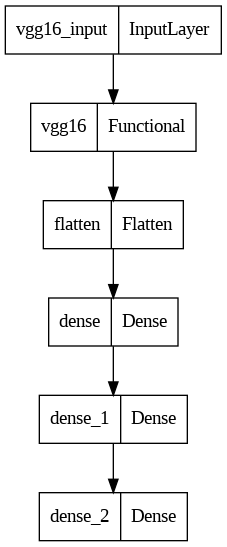

In [ ]:
plot_model(model)

In [ ]:
#generators

train_ds = image_dataset_from_directory(
    '/content/Datasets/cell_images/cell_images',
    batch_size=32,
    image_size=(128,128),
    seed = 124,
    validation_split=0.2,
    subset='training'
)
val_ds = image_dataset_from_directory(
    '/content/Datasets/cell_images/cell_images',
    batch_size=32,
    image_size=(128,128),
    seed = 124,
    validation_split=0.2,
    subset='validation'
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [ ]:
agum = Sequential([
    RandomBrightness(0.1),
    RandomContrast(0.2),
    RandomFlip(),
    RandomRotation(0.4 , fill_mode='nearest')
])

In [ ]:
def train_process(img , lbl):
  img = agum(img);
  img = tf.cast(img/255. , tf.float32);
  return img , lbl
def valid_process(img , lbl):
  img = tf.cast(img/255. , tf.float32);
  return img , lbl;


In [ ]:
process_train_ds = train_ds.map(train_process)
process_val_ds = val_ds.map(valid_process)

In [ ]:
model.compile(optimizer = 'adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model.fit(process_train_ds , epochs=25 , verbose=1 , validation_data=process_val_ds)

Epoch 1/25
689/689 [==============================] - 76s 108ms/step - loss: 0.2503 - accuracy: 0.9024 - val_loss: 0.1856 - val_accuracy: 0.9265
Epoch 2/25
689/689 [==============================] - 78s 113ms/step - loss: 0.1898 - accuracy: 0.9287 - val_loss: 0.1688 - val_accuracy: 0.9338
Epoch 3/25
689/689 [==============================] - 73s 105ms/step - loss: 0.1805 - accuracy: 0.9348 - val_loss: 0.1680 - val_accuracy: 0.9358
Epoch 4/25
689/689 [==============================] - 74s 106ms/step - loss: 0.1753 - accuracy: 0.9349 - val_loss: 0.1840 - val_accuracy: 0.9254
Epoch 5/25
689/689 [==============================] - 74s 108ms/step - loss: 0.1684 - accuracy: 0.9378 - val_loss: 0.1590 - val_accuracy: 0.9401
Epoch 6/25
689/689 [==============================] - 73s 106ms/step - loss: 0.1669 - accuracy: 0.9377 - val_loss: 0.1750 - val_accuracy: 0.9294
Epoch 7/25
689/689 [==============================] - 71s 103ms/step - loss: 0.1631 - accuracy: 0.9398 - val_loss: 0.2811 - val_ac

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "malaria-classification.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model.save('malaria-classification.keras')

In [ ]:



# train_96 , val_96 = endless((96,96))
# train_64 , val_64 = endless((64 , 64))
# train_32 , val_32 = endless((32 , 32))
# train_28 , val_28 = endless((28 , 28))

# train_comb = tf.data.Dataset.sample_from_datasets(
#     [train_96, train_64, train_32 , train_28]
# )
# val_comb = tf.data.Dataset.sample_from_datasets(
#     [val_96 , val_64 , val_32 , val_28]
# )
